In [9]:
!pwd

/aiffel/aiffel/datasets


## 이미지 리사이징 해서 복사

In [2]:
import os
import json
import glob
import matplotlib.pyplot as plt
import cv2
import shutil
import yaml

def remove_folder(path):
    if os.path.exists(path):#파일이 있으면
        shutil.rmtree(path) #제거
        print(f'{path} 폴더 제거 완료')
    if not os.path.exists(path):#파일이 없으면
        os.mkdir(path)
        print(f'{path} 폴더 생성 완료')

path = '/aiffel/aiffel/datasets/real_test_size5/' # 저장 폴더 경로
remove_folder(path)
        
png_path = glob.glob('/aiffel/aiffel/datasets/real_test/pngs/*.png')
for i in png_path:
    src = cv2.imread(i)
    img = cv2.resize(src, dsize=(960, 512), interpolation=cv2.INTER_LINEAR)
    cv2.imwrite(path+i.split('/')[-1] ,img)


/aiffel/aiffel/datasets/real_test_size5/ 폴더 제거 완료
/aiffel/aiffel/datasets/real_test_size5/ 폴더 생성 완료


## json 복사

In [17]:
import os
from glob import glob

path = '/aiffel/aiffel/datasets/real_test_size5/'# 카피할 경로
jsons = glob('/aiffel/aiffel/datasets/real_test/jsons/*.json')# src

for i in jsons:
    shutil.copyfile(i, path+i.split('/')[-1])

## train, val나누기

In [29]:
from sklearn.model_selection import train_test_split
from glob import glob 

jsons = glob('/aiffel/aiffel/datasets/size_5/*.json')

train, val = train_test_split(jsons, test_size=0.2, random_state=2022)


True

## json 확인

In [12]:
import os
import json
import glob
import matplotlib.pyplot as plt
import cv2
import shutil
import yaml
json_path = glob.glob('/aiffel/aiffel/datasets/final_dataset/labels/*.json')
for i in json_path:
    with open(i,'r')as f:
        dict_ = json.load(f)
        print(dict_)
        break

{'filename': '1659489386020_FR-View-CMR-Wide.png', 'weather': 'cloudy', 'illumination_status': 'normal', 'road_status': 'wet', 'crowd_level': 'middle', 'sensor_status': 'normal', 'annotations': [{'id': '3-3058cac6-6063-4856-8ff2-a89184296c51', 'type': 'bbox', 'attribute': 'car', 'points': [[0.26875, 0.759765625], [0.39427083333333335, 0.759765625], [0.39427083333333335, 0.9033203125], [0.26875, 0.9033203125]], 'occlusion': 0, 'truncation': 0, 'scenario': 0, 'isfake': 0, 'ismask': 0, 'area': 35427}, {'id': '5-c7a8b9e8-3aa8-4120-96cd-1727ba0cad6a', 'type': 'bbox', 'attribute': 'car', 'points': [[0.4109375, 0.7783203125], [0.44427083333333334, 0.7783203125], [0.44427083333333334, 0.830078125], [0.4109375, 0.830078125]], 'occlusion': 1, 'truncation': 0, 'scenario': 0, 'isfake': 0, 'ismask': 0, 'area': 3392}, {'id': '7-c1cb8fa8-c423-4f78-a37f-2b3ff40dcfa7', 'type': 'bbox', 'attribute': 'car', 'points': [[0.5557291666666667, 0.7734375], [0.6192708333333333, 0.7734375], [0.6192708333333333, 0

## 인풋파일 생성

In [1]:
import os
import json
import glob
import matplotlib.pyplot as plt
import cv2
import shutil
import yaml
from sklearn.model_selection import train_test_split

def remove_folder(path):
    if os.path.exists(path):#파일이 있으면
        shutil.rmtree(path) #제거
        print(f'{path} 폴더 제거 완료')
    if not os.path.exists(path):#파일이 없으면
        os.mkdir(path)
        print(f'{path} 폴더 생성 완료')

def make_folder(path):
    if not os.path.exists(path): # 이미지 폴더가 없으면
        os.makedirs(path)# 폴더 생성
        print(f'{path} 폴더 생성 완료')
        
def saving(path, part, png, filename=None, anno=None, width=None, height=None):
    images_path = f'{path}/images/{part}'
    labels_path = f'{path}/labels/{part}'
    
    # 이미지 저장
#     shutil.copyfile(png, f"{images_path}/{png.split('/')[-1]}")
    src = cv2.imread(png)
    img = cv2.resize(src, dsize=(960, 512), interpolation=cv2.INTER_LINEAR)
    cv2.imwrite(images_path+'/'+png.split('/')[-1] ,img)
    
    # 이미지 경로 저장
    if not os.path.exists(f"{path}/{part}.txt"):# 파일이 없으면
        
        f = open(f"{path}/{part}.txt",'w') # 파일 생성
        f.close()
        
    with open(f"{path}/{part}.txt", 'a')as f:#  이어쓰기
        f.write(f"{images_path}/{png.split('/')[-1]}\n")

        for i in anno:
            label = i['attribute'] # 라벨명
            bbox = i['points'] # bbox 좌표 
            x,y,w,h = ((bbox[0][0]+bbox[2][0])/2), ((bbox[0][1]+bbox[2][1])/2),\
            (bbox[2][0] - bbox[0][0]), (bbox[2][1]-bbox[0][1])#

            # 라벨.txt 저장
            if not os.path.exists(f"{labels_path}/{filename}"):# 파일이 없으면
                f = open(f"{labels_path}/{filename}",'w') # 파일 생성
                f.close()
            with open(f"{labels_path}/{filename}", 'a') as f: # 이어 쓰기
                    f.writelines(f"{atts[label]} {x} {y} {w} {h}\n")
                

atts = {'car': 0,'pedestrian': 1,'truck': 2,'bus': 3}

# 만든 데이터를 저장할 폴더 (없으면 만들어줌)
path = '/aiffel/aiffel/yolov7_start/input_file'

# 학습 데이터가 있는 경로
png_path = sorted(glob.glob('/aiffel/aiffel/datasets/final_dataset/images/*.png'))
json_path = sorted(glob.glob('/aiffel/aiffel/datasets/final_dataset/labels/*.json'))


# 만들어둔 input 데이터가 있으면 삭제하고 폴더만 재생성
remove_folder(path)

# train, val, test 각각의 폴더 만들기
make_folder(path+'/images/train')
make_folder(path+'/labels/train')
make_folder(path+'/images/val')
make_folder(path+'/labels/val')
make_folder(path+'/images/test')
    
# 학습,검증셋 분리
train, val = train_test_split(json_path, test_size=0.2, random_state=2022)

for png, json_ in zip(png_path, json_path):# 데이터 읽어와서
    with open(json_, 'r')as f:
        dict = json.load(f)
    # 파일 이름 +.txt --> 라벨 저장할 txt
    filename = dict['filename'][:-4]+'.txt'
    anno = dict['annotations']
    # 데이터 개수 지정
    if json_ in train: #  train 
        saving(path, 'train', png, filename, anno)
        
    elif json_ in val:# val
        saving(path, 'val', png, filename, anno)
        
test_path = '/aiffel/aiffel/datasets/real_test/'

# 테스트 데이터가 있는 경로
test_png_path = sorted(glob.glob('/aiffel/aiffel/datasets/real_test/pngs/*.png'))
test_json_path = sorted(glob.glob('/aiffel/aiffel/datasets/real_test/jsons/*.json'))
# 테스트 파일 따로 생성
for png in test_path:
    saving(path, 'test', png)
        
print('데이터 생성 완료')
    
# yaml만들기

atts_dict = {i:j for i,j in enumerate(atts)}

yaml_dict = {'train':path+'/train.txt', 'val':path+'/val.txt', 'test':path+'/test.txt', 'nc':len(atts),'names' :list( atts_dict.values())}

# yaml저장
if not os.path.exists(f"{path}/coco.yaml"):# 파일이 없으면
    f = open(f"{path}/coco.yaml",'w') # 파일 생성
    f.close()
with open(f"{path}/coco.yaml", 'a') as f: # 이어 쓰기
    yaml.dump(yaml_dict,f, sort_keys = False)
    print('yaml생성 완료')
       

/aiffel/aiffel/yolov7_start/input_file 폴더 제거 완료
/aiffel/aiffel/yolov7_start/input_file 폴더 생성 완료
/aiffel/aiffel/yolov7_start/input_file/images/train 폴더 생성 완료
/aiffel/aiffel/yolov7_start/input_file/labels/train 폴더 생성 완료
/aiffel/aiffel/yolov7_start/input_file/images/val 폴더 생성 완료
/aiffel/aiffel/yolov7_start/input_file/labels/val 폴더 생성 완료
/aiffel/aiffel/yolov7_start/input_file/images/test 폴더 생성 완료
데이터 생성 완료
yaml생성 완료


## 만들어진 데이터 bbox 확인

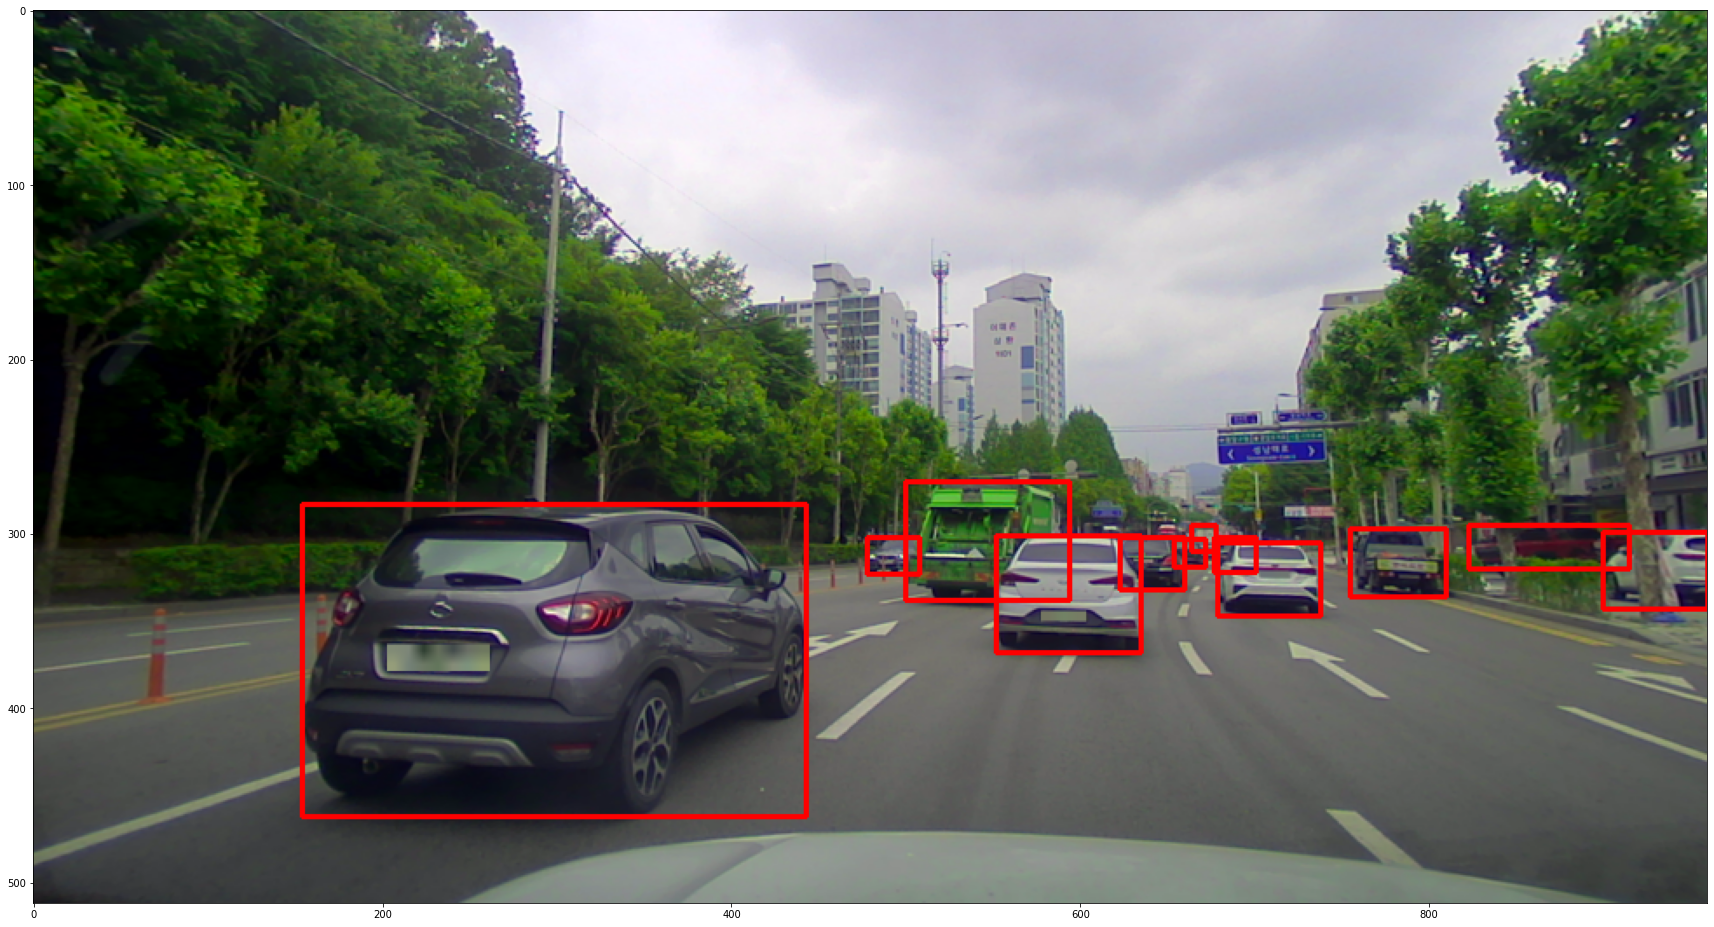

In [3]:
import os
import json
from glob import glob
import matplotlib.pyplot as plt
import cv2
import shutil
import yaml
pngs = sorted(glob('/aiffel/aiffel/yolov7_start/input_file/images/train/*.png'))
jsons = sorted(glob('/aiffel/aiffel/yolov7_start/input_file/labels/train/*.txt'))
plt.figure(figsize = (30,20))
for i,j in zip(pngs,jsons):
    with open(j,'r')as f:
        bboxs = f.readlines()
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in bboxs:
        bbox = i.split(' ')
        x,y,w,h = float(bbox[1]), float(bbox[2]), float(bbox[3]), float(bbox[4].split('\n')[0])
        x_min,y_min,x_max,y_max = (x-(w/2))*960, (y-(h/2))*512,(x+(w/2))*960, (y+(h/2))*512 
        img = cv2.rectangle(img, (int(x_min),int(y_min)), (int(x_max),int(y_max)), (255,0,0), 2)
        plt.imshow(img)
    break

## 테스트 라벨 만들기

In [ ]:
[{"image_id": "1654739379963_FR-View-CMR-Wide", "category_id": 0, "bbox": [646.5, 292.5, 160.0, 92.0], "score": 0.98975},
 {"image_id": "1654739379963_FR-View-CMR-Wide", "category_id": 0, "bbox": [244.0, 292.5, 200.0, 109.0], "score": 0.98633},]

In [1]:
import json
from glob import glob

jsons = glob('/aiffel/aiffel/datasets/real_test/jsons/*.json')
all_jsons = []
for i in jsons:
    with open(i,'r')as f:
        info = json.load(f)
    for j in info['annotations']:
        print(type(j['points'][0][0]))
        break
    break

<class 'int'>


In [6]:
import json
from glob import glob

jsons = glob('/aiffel/aiffel/datasets/final_test/jsons/*.json')
all_jsons = []
for i in jsons:
    with open(i,'r')as f:
        info = json.load(f)
    dict_ = {}
    for j in info['annotations']:      
        x,y,w,h = ((j['points'][2][0]+j['points'][0][0])/2)/1920*960, ((j['points'][2][1]+j['points'][0][1])/2)/1024*512,\
        ((j['points'][2][0]-j['points'][0][0]))/1920*960,((j['points'][2][1]+j['points'][0][1]))/1024*512
        
        if j['attribute'] in ['car']:
            dict_['image_id'] = info['filename'][:-4]   
            dict_['category_id'] = 0
            dict_['bbox'] = [x,y,w,h]
        elif j['attribute'] in ['adult','child','specialclothes']:
            dict_['image_id'] = info['filename'][:-4]   
            dict_['category_id'] = 1
            dict_['bbox'] = [x,y,w,h]
        elif j['attribute'] in ['truck_l','truck_s']:
            dict_['image_id'] = info['filename'][:-4]   
            dict_['category_id'] = 2
            dict_['bbox'] = [x,y,w,h]
        elif j['attribute'] in ['bus_l','bus_s']:
            dict_['image_id'] = info['filename'][:-4]   
            dict_['category_id'] = 3
            dict_['bbox'] = [x,y,w,h]
        
        all_jsons.append(dict_)
        
new_json = {'annotations':all_jsons}
with open(f"/aiffel/aiffel/datasets/final_test/test.json", 'w') as f: # 이어 쓰기
    json.dump(new_json,f, sort_keys = False)
    print('json 생성 완료')

json 생성 완료


In [5]:
# !rm -rf /aiffel/aiffel/datasets/final_test/test.json

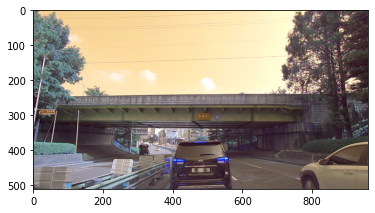

In [5]:
from glob import glob
import matplotlib.pyplot as plt
import cv2
pngs = sorted(glob('/aiffel/aiffel/yolov7_start/input_file/images/test/*.png'))
# jsons = sorted(glob('/aiffel/aiffel/yolov7_start/input_file/labels/train/*.txt'))
img = cv2.imread(pngs[0])
plt.imshow(img)